# Setup

In [1]:
# Get VM CPU and R version
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}
shell_call("grep -m1 'model name' /proc/cpuinfo | awk -F': ' '{printf \" CPU Model: %s \\n \",  $2}'")
shell_call("grep 'cpu cores' /proc/cpuinfo  | awk -F': ' '{a[cores]+=$2}END{printf \"CPU Cores: %s \\n \", a[cores] }'")
shell_call("grep MemTotal /proc/meminfo | awk '{printf \"RAM: %.1fGB \\n \", $2 / 1024 / 1024}'")
shell_call("R --version | head -n 1")

 CPU Model: Intel(R) Xeon(R) CPU @ 2.20GHz 
 CPU Cores: 32 
 RAM: 51.0GB 
 R version 4.4.1 (2024-06-14) -- "Race for Your Life"

In [2]:
# Install Torch

Sys.setenv(CUDA='cpu')
install.packages("torch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("torch"):
“installation of package ‘torch’ had non-zero exit status”


In [3]:
# Test Torch installation

library(torch)
torch_rand(4)

torch_tensor
 0.5309
 0.4939
 0.6571
 0.3490
[ CPUFloatType{4} ]

In [4]:
# Install BKTR

install.packages('BKTR')

### From Github (Latest Version)
# install.packages("devtools") # if not installed
# devtools::install_github("julien-hec/BKTR", ref = "main")

# For section 4 side by side plots
install.packages('ggpubr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [5]:
# The following block is because Jupyter for R does not print until the end of
# the code block execution. So, with this command we add real time printing.
# See: https://stackoverflow.com/questions/37689694/real-time-printing-to-console-with-r-in-jupyter
trace(what = "print", where = getNamespace("base"), exit = flush.console, print = FALSE)

Tracing function "print" in package "namespace:base"



[1] "print"

# Load Libraries

In [6]:
# Code to run BKTR examples #
# Lanthier, Lei, Sun and Labbe 2023 #

library('BKTR')
library(data.table)
library(ggplot2)
library('ggpubr')

# Run BKTR

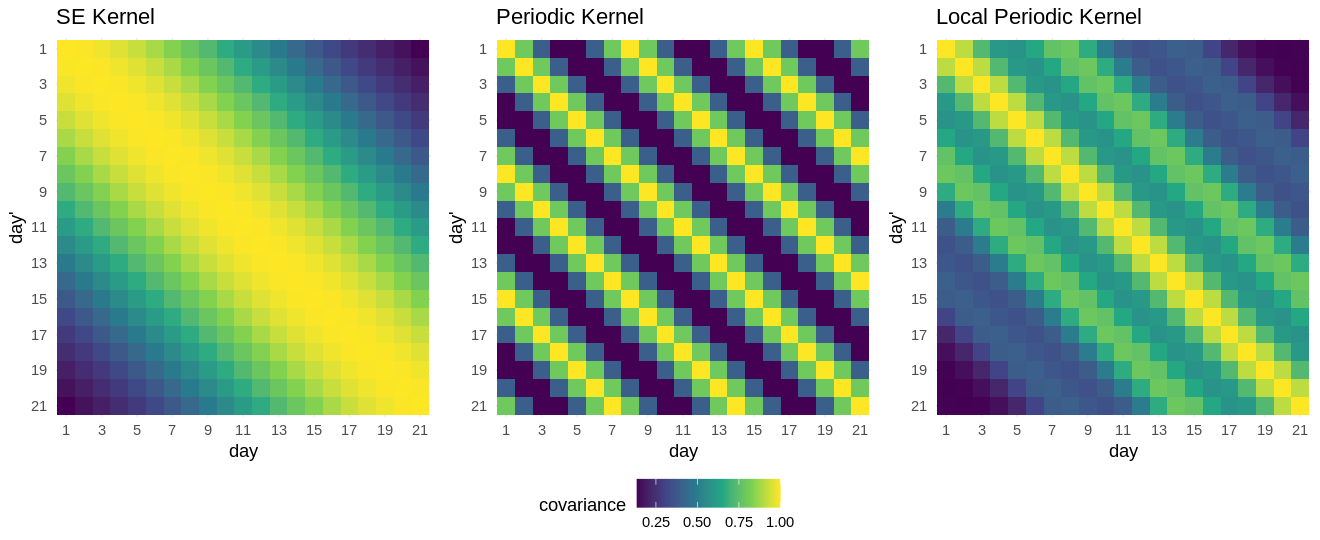

In [33]:
###########################
###########################
# Section 4: BKTR Kernels #
###########################
###########################

MIN_DAY <- 1
MAX_DAY <- 21
pos_df <- data.frame(day=MIN_DAY:MAX_DAY, pos = as.numeric(MIN_DAY:MAX_DAY))

# Create three kernels: Periodic, SE and Local Periodic
se_lengthscale <- KernelParameter$new(value = 10)
per_length <- KernelParameter$new(value = 7, is_fixed = TRUE)
k_periodic <- KernelPeriodic$new(period_length = per_length)
k_se <- KernelSE$new(lengthscale = se_lengthscale)
k_local_periodic <- k_periodic * k_se
k_se$set_positions(pos_df)
k_periodic$set_positions(pos_df)
k_local_periodic$set_positions(pos_df)
# Set their covariance matrices
cov_per <- k_periodic$kernel_gen()
cov_se <- k_se$kernel_gen()
cov_lper <- k_local_periodic$kernel_gen()

# Create plot scales
sxd <- scale_x_discrete(
  limits = factor(MIN_DAY:MAX_DAY),
  breaks = as.character(seq(MIN_DAY, MAX_DAY, by = 2))
)
syd <- scale_y_discrete(
  limits = factor(MAX_DAY:MIN_DAY),
  breaks = as.character(seq(MAX_DAY, MIN_DAY, by = -2))
)
sfv <- scale_fill_viridis_c()

# Plot each kernels
p_se <- k_se$plot(show_figure = FALSE)
p_per <- k_periodic$plot(show_figure = FALSE)
p_lper <- k_local_periodic$plot(show_figure = FALSE)

# Replace scales on all figure
for (p in list(p_se, p_per, p_lper)) {
  p$scales$scales <- list(sxd, syd, sfv)
}

# For good proportions in a notebook, uncomment the following line
options(repr.plot.width = 11, repr.plot.height = 4.5)

# Make one plot with all kernels (Figure 3)
plt <- ggarrange(p_se, p_per, p_lper + ggtitle('Local Periodic Kernel'),
          common.legend = TRUE, ncol = 3, legend = 'bottom')

plt
